In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import chardet

In [4]:
df = pd.read_csv("C:/Users/Flora/OneDrive - 창원대학교/문서/.이세은/3-1 교과목/머신러닝/6주차/train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer = SimpleImputer(strategy='mean')

In [8]:
df['Age'] = imputer.fit_transform(df[['Age']])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
import scipy.stats as ss

In [11]:
# df['zscore'] = ss.zscore(df['RoomService'])
# df.info()

In [12]:
ser = df['Age']

In [13]:
ser

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d102a5c088>,
 'caps': [<matplotlib.lines.Line2D at 0x1d104a7adc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d102a6fa08>],
 'medians': [<matplotlib.lines.Line2D at 0x1d102a6fd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d104a7aac8>],
 'means': []}

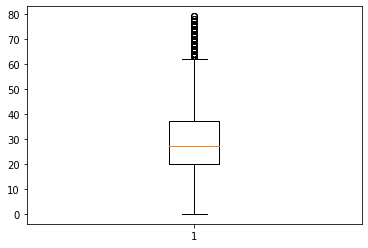

In [14]:
fig, ax = plt.subplots()
ax.boxplot(ser)

In [16]:
Q3, Q1 = np.percentile(ser, [75, 25])
IQR = Q3-Q1
IQR

17.0

In [17]:
result = ser[(Q1-1.5*IQR > ser) | (Q3+1.5*IQR < ser)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d104e73648>,
 'caps': [<matplotlib.lines.Line2D at 0x1d104e73808>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d104e6fd48>],
 'medians': [<matplotlib.lines.Line2D at 0x1d104e73948>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d104e73708>],
 'means': []}

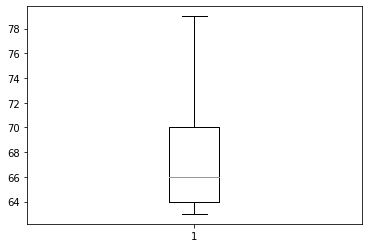

In [18]:
fig, ax = plt.subplots()
ax.boxplot(result)

In [20]:
zx = ss.zscore(ser)
result = ser[zx < 2]
print(zx.shape, result.shape)

(8693,) (8357,)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d104efffc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d104f03e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d104eff808>],
 'medians': [<matplotlib.lines.Line2D at 0x1d104eaff08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d104f030c8>],
 'means': []}

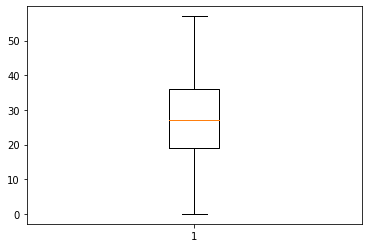

In [21]:
fig, ax = plt.subplots()
ax.boxplot(result)